# IMPORT DEPENDENCIES (MODULE)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stat
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [2]:
df = pd.read_csv('epi_r.csv') # uploading the CSV file inside the dataframe.
df.head()

title  rating  calories  protein   
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0  \
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes   
0   7.0   559.0        0.0         0.0              0.0                   0.0  \
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers   
0  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0  \
1  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
2  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
3  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
4  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0         0.0     1.0  
1    0.0         0.0     0.0  
2    0.0         0.0     0.0  
3    0.0         0.0     0.0  
4    0.0         0.0     0.0  

[5 rows x 680 columns]

# PRE-PROCESSING UNIT

In [3]:
df.tail()

title  rating  calories  protein   
20047                              Parmesan Puffs    3.125      28.0      2.0  \
20048              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20049                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20050     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0   

        fat  sodium  #cakeweek  #wasteless  22-minute meals   
20047   2.0    64.0        0.0         0.0              0.0  \
20048  28.0   583.0        0.0         0.0              0.0   
20049  38.0   652.0        0.0         0.0              0.0   
20050  24.0   517.0        0.0         0.0              0.0   
20051  10.0  3698.0        0.0         0.0              0.0   

       3-ingredient recipes  ...  yellow squash  yogurt  yonkers  yuca   
20047                   0.0  ...            0.0     0.0      0.0   0.0  \
20048                   0.0  ...            0.0     0.0      0.0   0.0   
20049                   0.0  ...            0.0     0.0      0.0   0.0   
20050                   0.0  ...            0.0     0.0      0.0   0.0   
20051                   0.0  ...            0.0     0.0      0.0   0.0   

       zucchini  cookbooks  leftovers  snack  snack week  turkey  
20047       0.0        0.0        0.0    0.0         0.0     0.0  
20048       0.0        0.0        0.0    0.0         0.0     0.0  
20049       0.0        0.0        0.0    0.0         0.0     1.0  
20050       0.0        0.0        0.0    0.0         0.0     0.0  
20051       0.0        0.0        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]

In [4]:
#describing the detail
df.describe()

rating      calories        protein           fat        sodium   
count  20052.000000  1.593500e+04   15890.000000  1.586900e+04  1.593300e+04  \
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.590460e+05    3840.318527  2.045611e+04  3.333182e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  1.980000e+02       3.000000  7.000000e+00  8.000000e+01   
50%        4.375000  3.310000e+02       8.000000  1.700000e+01  2.940000e+02   
75%        4.375000  5.860000e+02      27.000000  3.300000e+01  7.110000e+02   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes   
count  20052.000000  20052.000000     20052.000000          20052.000000  \
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105              0.036671   
min        0.000000      0.000000         0.000000              0.000000   
25%        0.000000      0.000000         0.000000              0.000000   
50%        0.000000      0.000000         0.000000              0.000000   
75%        0.000000      0.000000         0.000000              0.000000   
max        1.000000      1.000000         1.000000              1.000000   

       30 days of groceries  ...  yellow squash        yogurt       yonkers   
count          20052.000000  ...   20052.000000  20052.000000  20052.000000  \
mean               0.000349  ...       0.001247      0.026332      0.000050   
std                0.018681  ...       0.035288      0.160123      0.007062   
min                0.000000  ...       0.000000      0.000000      0.000000   
25%                0.000000  ...       0.000000      0.000000      0.000000   
50%                0.000000  ...       0.000000      0.000000      0.000000   
75%                0.000000  ...       0.000000      0.000000      0.000000   
max                1.000000  ...       1.000000      1.000000      1.000000   

               yuca      zucchini     cookbooks     leftovers         snack   
count  20052.000000  20052.000000  20052.000000  20052.000000  20052.000000  \
mean       0.000299      0.014861      0.000150      0.000349      0.001396   
std        0.017296      0.121001      0.012231      0.018681      0.037343   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         snack week        turkey  
count  20052.000000  20052.000000  
mean       0.000948      0.022741  
std        0.030768      0.149080  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 679 columns]

### Missing or NaN Data handling

In [5]:
print(df.isna().sum()) #checking the overall null values inisde the dataframe column.

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64


In [6]:
df.fillna(df.ffill(), inplace = True)

In [7]:
df.isna().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

In [8]:
df.head(10)

title  rating  calories   
0                    Lentil, Apple, and Turkey Wrap    2.500     426.0  \
1        Boudin Blanc Terrine with Red Onion Confit    4.375     403.0   
2                      Potato and Fennel Soup Hodge    3.750     165.0   
3                   Mahi-Mahi in Tomato Olive Sauce    5.000     165.0   
4                          Spinach Noodle Casserole    3.125     547.0   
5                                     The Best Blts    4.375     948.0   
6  Ham and Spring Vegetable Salad with Shallot Vi...   4.375     948.0   
7                              Spicy-Sweet Kumquats    3.750     948.0   
8                             Korean Marinated Beef    4.375     170.0   
9  Ham Persillade with Mustard Potato Salad and M...   3.750     602.0   

   protein   fat  sodium  #cakeweek  #wasteless  22-minute meals   
0     30.0   7.0   559.0        0.0         0.0              0.0  \
1     18.0  23.0  1439.0        0.0         0.0              0.0   
2      6.0   7.0   165.0        0.0         0.0              0.0   
3      6.0   7.0   165.0        0.0         0.0              0.0   
4     20.0  32.0   452.0        0.0         0.0              0.0   
5     19.0  79.0  1042.0        0.0         0.0              0.0   
6     19.0  79.0  1042.0        0.0         0.0              0.0   
7     19.0  79.0  1042.0        0.0         0.0              0.0   
8      7.0  10.0  1272.0        0.0         0.0              0.0   
9     23.0  41.0  1696.0        0.0         0.0              0.0   

   3-ingredient recipes  ...  yellow squash  yogurt  yonkers  yuca  zucchini   
0                   0.0  ...            0.0     0.0      0.0   0.0       0.0  \
1                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
2                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
3                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
4                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
5                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
6                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
7                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
8                   0.0  ...            0.0     0.0      0.0   0.0       0.0   
9                   0.0  ...            0.0     0.0      0.0   0.0       0.0   

   cookbooks  leftovers  snack  snack week  turkey  
0        0.0        0.0    0.0         0.0     1.0  
1        0.0        0.0    0.0         0.0     0.0  
2        0.0        0.0    0.0         0.0     0.0  
3        0.0        0.0    0.0         0.0     0.0  
4        0.0        0.0    0.0         0.0     0.0  
5        0.0        0.0    0.0         0.0     0.0  
6        0.0        0.0    0.0         0.0     0.0  
7        0.0        0.0    0.0         0.0     0.0  
8        0.0        0.0    0.0         0.0     0.0  
9        0.0        0.0    0.0         0.0     0.0  

[10 rows x 680 columns]

### Duplicates Handling

In [9]:
df.duplicated().sum()

1418

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

### Outlier handling with Z_SCORE Technique

In [12]:
df.columns.values.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [13]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18634 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 96.8+ MB


In [15]:
df['rating'].dtype

dtype('float64')

In [16]:
columns = ['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',]

In [17]:
data = df[columns]
data.head()

title  rating  calories  protein   
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0  \
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000     165.0      6.0   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  
0   7.0   559.0  
1  23.0  1439.0  
2   7.0   165.0  
3   7.0   165.0  
4  32.0   452.0

In [18]:
data = data.drop(columns = ['title'])

In [19]:
data.columns

Index(['rating', 'calories', 'protein', 'fat', 'sodium'], dtype='object')

In [20]:
#Outlier Handling with the help of Z_Score method
def outlier_handler(clmn):
    data['z_score'] = (clmn - clmn.mean()) / clmn.std()
    outlier_threshold = 3
    mask = data['z_score'].abs() >= outlier_threshold
    clmn[mask] = float('NaN')
    return clmn

In [21]:
for i in range(5):
    for col in data.columns:
        data[col] = outlier_handler(data[col])

In [22]:
data.describe()

rating      calories       protein           fat        sodium   
count  18634.000000  17531.000000  17420.000000  17662.000000  17462.000000  \
mean       3.712971    390.034339     14.599770     21.370853    408.049880   
std        1.336206    261.960648     15.843941     18.543107    419.395845   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.750000    195.000000      3.000000      7.000000     76.000000   
50%        4.375000    319.000000      8.000000     17.000000    264.000000   
75%        4.375000    535.500000     22.000000     30.000000    613.000000   
max        5.000000   1226.000000     67.000000     83.000000   1817.000000   

            z_score  
count  17462.000000  
mean      -0.056377  
std        0.909381  
min       -0.941157  
25%       -0.776365  
50%       -0.368723  
75%        0.388019  
max        2.998668

In [23]:
data['title'] = df['title']
data.isna().sum()

rating         0
calories    1103
protein     1214
fat          972
sodium      1172
z_score     1172
title          0
dtype: int64

To address the absence of preparation times in the dataset, I created a new column, 'Prep-Time,' based on the calorie content of each recipe. Recipes with fewer than 200 calories have a prep time of 5 to 10 minutes. Those with 200 to 500 calories take 15 to 30 minutes, while recipes with 500 to 800 calories require 30 to 60 minutes. Lastly, recipes exceeding 800 calories typically take 60 to 120 minutes. This approach fills a significant gap in the dataset and enhances its usability.

In [24]:
def estimate_prep_time_based_on_calories(data):
    calories = data['calories']
    
    if calories < 200:  #low calories meals
        return random.randint(5, 15)
    elif 200 <= calories < 500:  #Moderate-calorie meals
        return random.randint(15, 30)
    elif 500 <= calories < 800:  #High-calorie meals
        return random.randint(30, 60)
    else:  # Very high-calorie meals 
        return random.randint(60, 120)

# Apply the function to your dataset
data['prep_time'] = data.apply(estimate_prep_time_based_on_calories, axis=1)

In [25]:
data.dropna(inplace = True)

In [26]:
data.isna().sum()

rating       0
calories     0
protein      0
fat          0
sodium       0
z_score      0
title        0
prep_time    0
dtype: int64

In [27]:
data = data.drop(columns = ['z_score'])
data.describe()

rating      calories       protein           fat        sodium   
count  16293.000000  16293.000000  16293.000000  16293.000000  16293.000000  \
mean       3.696564    361.994906     13.277972     19.608053    376.537593   
std        1.346639    231.502274     14.627396     16.727824    396.979465   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.750000    191.000000      3.000000      7.000000     67.000000   
50%        4.375000    305.000000      7.000000     16.000000    235.000000   
75%        4.375000    498.000000     19.000000     28.000000    562.000000   
max        5.000000   1223.000000     67.000000     83.000000   1816.000000   

          prep_time  
count  16293.000000  
mean      27.331799  
std       20.657856  
min        5.000000  
25%       15.000000  
50%       22.000000  
75%       30.000000  
max      120.000000

# VISUALIZATION

### Key Insight (Assignment)

In [28]:
data.head()

rating  calories  protein   fat  sodium   
0   2.500     426.0     30.0   7.0   559.0  \
1   4.375     403.0     18.0  23.0  1439.0   
2   3.750     165.0      6.0   7.0   165.0   
3   5.000     165.0      6.0   7.0   165.0   
4   3.125     547.0     20.0  32.0   452.0   

                                         title  prep_time  
0              Lentil, Apple, and Turkey Wrap          20  
1  Boudin Blanc Terrine with Red Onion Confit          20  
2                Potato and Fennel Soup Hodge          14  
3             Mahi-Mahi in Tomato Olive Sauce           7  
4                    Spinach Noodle Casserole          40

In [29]:
highly_rated = data[data['rating'] >= 4]

In [30]:
ingredient_count = highly_rated['title'].value_counts().head(10)

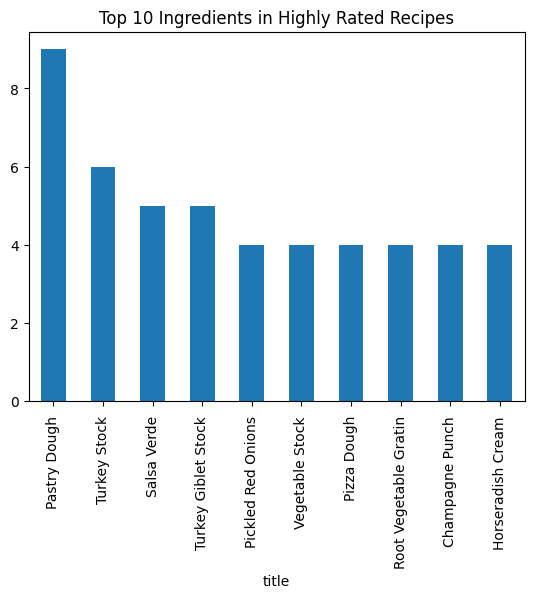

In [31]:
ingredient_count.plot(kind='bar', title='Top 10 Ingredients in Highly Rated Recipes')
plt.show()

#### Conclusion: The Top 10 Ingredients in Higly Rated Recipes are :- 
1) Pastry Dough
2) Turkey Stock
3) Simple Syrup
4) Salsa Verde
5) Turkey Giblet Stock
6) Pizza Dough
7) Root Vegetable Gratin
8) Vegetable Stock
9) Chicken Stock
10) Horseradish Cream

In [32]:
#correlation between the preparation time and recipe rating
data.head()

rating  calories  protein   fat  sodium   
0   2.500     426.0     30.0   7.0   559.0  \
1   4.375     403.0     18.0  23.0  1439.0   
2   3.750     165.0      6.0   7.0   165.0   
3   5.000     165.0      6.0   7.0   165.0   
4   3.125     547.0     20.0  32.0   452.0   

                                         title  prep_time  
0              Lentil, Apple, and Turkey Wrap          20  
1  Boudin Blanc Terrine with Red Onion Confit          20  
2                Potato and Fennel Soup Hodge          14  
3             Mahi-Mahi in Tomato Olive Sauce           7  
4                    Spinach Noodle Casserole          40

In [33]:
data = data.drop(columns = ['title'])
correlation = data.corr()
correlation

rating  calories   protein       fat    sodium  prep_time
rating     1.000000  0.110409  0.102272  0.114678  0.090702   0.095315
calories   0.110409  1.000000  0.648747  0.837604  0.431494   0.863201
protein    0.102272  0.648747  1.000000  0.556734  0.540246   0.546057
fat        0.114678  0.837604  0.556734  1.000000  0.376612   0.729751
sodium     0.090702  0.431494  0.540246  0.376612  1.000000   0.353813
prep_time  0.095315  0.863201  0.546057  0.729751  0.353813   1.000000

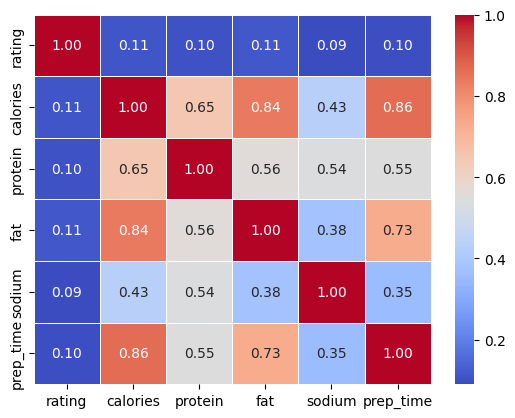

In [34]:
sns_cor = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [35]:
specified_corr = correlation.loc['prep_time', 'rating']
print(f'This is correlation between the prep_time and Rating : {specified_corr}')

This is correlation between the prep_time and Rating : 0.09531509687925464


#### Conclusion: 
As according to my analysis Overall, the correlation of 0.0882 suggests a negligible relationship between preparation time and recipe ratings. This means that changes in preparation time are unlikely to predict or influence the ratings given by users for the recipes

we can also use scatter plot, regression, hypothesis(person) to show these correlation between the preparation Time and rating

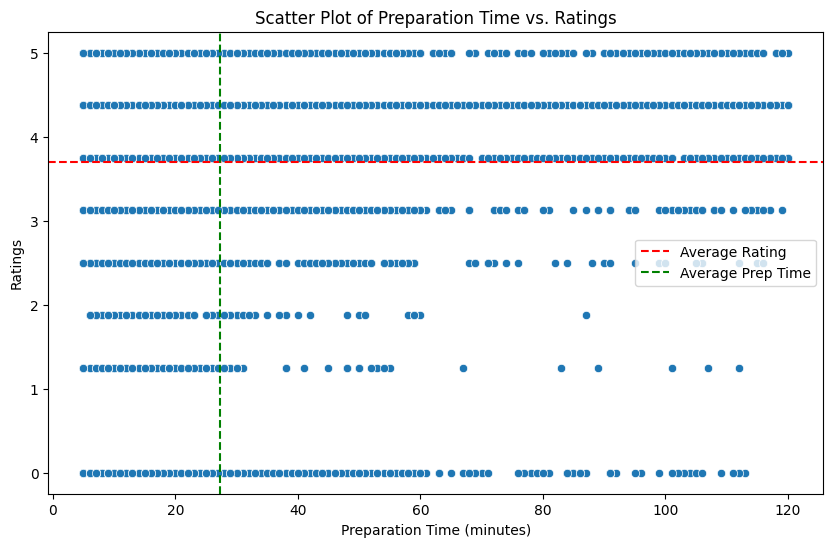

In [36]:
# Scatter Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='prep_time', y='rating')
plt.title('Scatter Plot of Preparation Time vs. Ratings')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Ratings')
plt.axhline(y=data['rating'].mean(), color='r', linestyle='--', label='Average Rating')
plt.axvline(x=data['prep_time'].mean(), color='g', linestyle='--', label='Average Prep Time')
plt.legend()
plt.show()

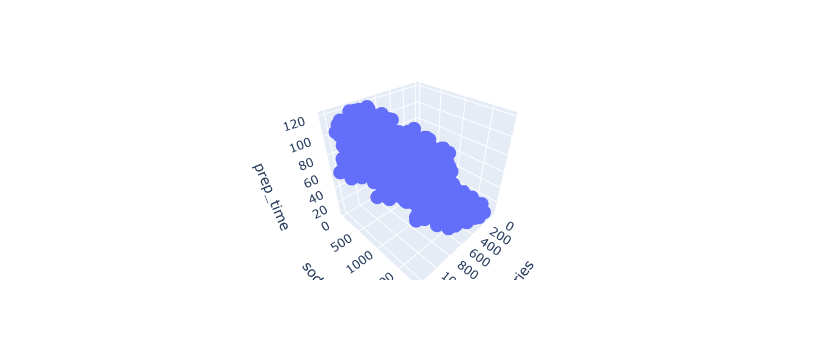

In [37]:
scatter_3d = px.scatter_3d(data, x = 'calories' , y= 'sodium', z = 'prep_time')
scatter_3d.show()

In [38]:
def skewness_checker(data_columns):
    for col in data_columns.columns:
        plt.figure(figsize = (15, 7))
        plt.subplot(3,3,1)
        sns.violinplot(data_columns[col], orient = 'h')
        plt.title(col)
    
        plt.subplot(3,3,2)
        plt.boxplot(data_columns[col])
        plt.title(col)
    
        plt.subplot(3,3,3)
        stat.probplot(data_columns[col], dist="norm", plot=plt)
        plt.title(col)

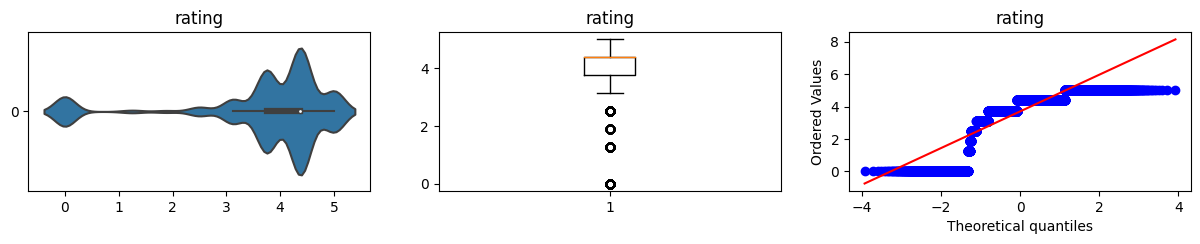

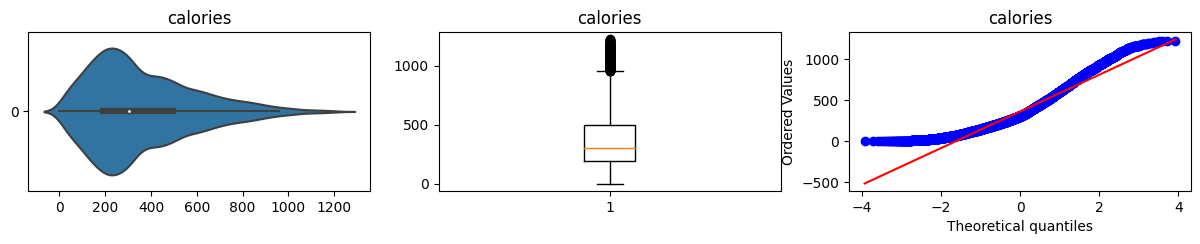

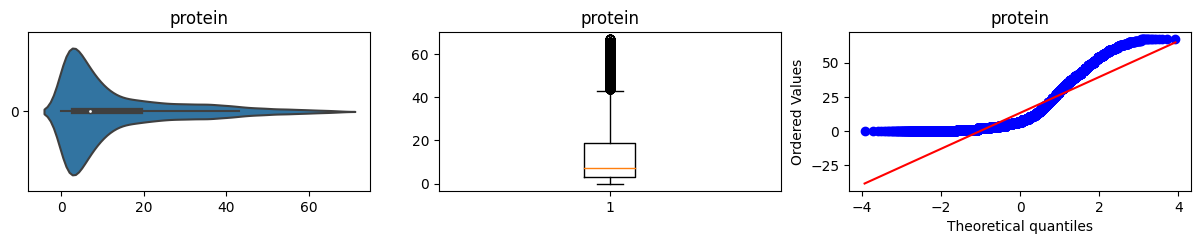

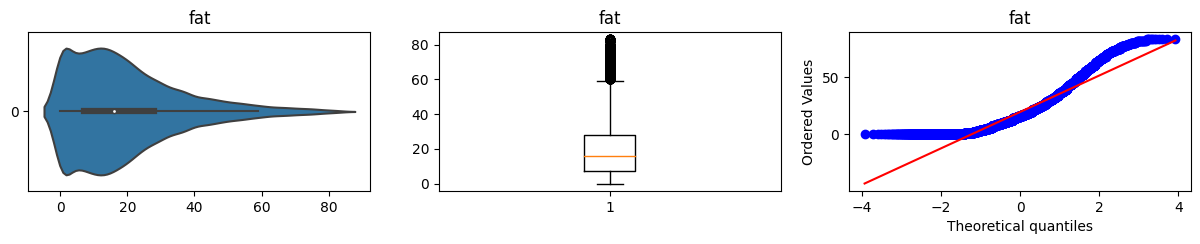

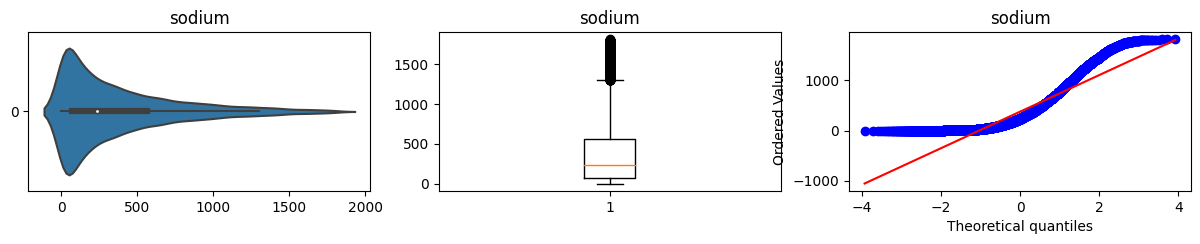

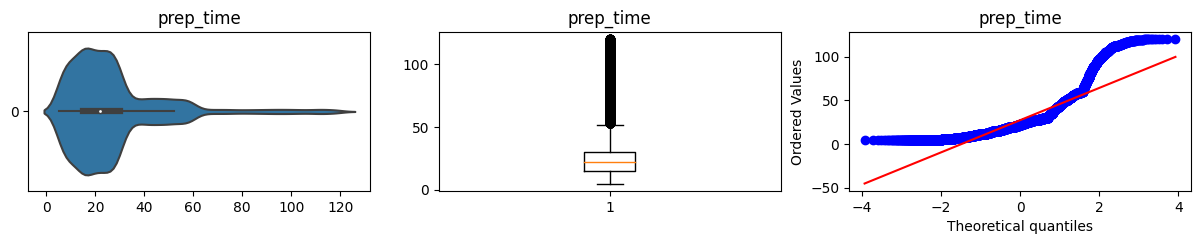

In [39]:
skewness_checker(data)